In [1]:
import sys
sys.path.append('../..')
sys.path.append('../brute-force')

In [2]:
from bfcheck import BF_Checker
from clustering_model import Clustering_Model

In [3]:
def get_edges(graph):
    edges = []
    for u in range(len((graph))):
        for v in graph[u]:
            if u<v:
                edges.append((u, v))
    return edges

In [4]:
def get_graph(n, edges):
    graph = [[] for _ in range(n)]
    for u, v in edges:
        graph[u].append(v)
        graph[v].append(u)
    return graph

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

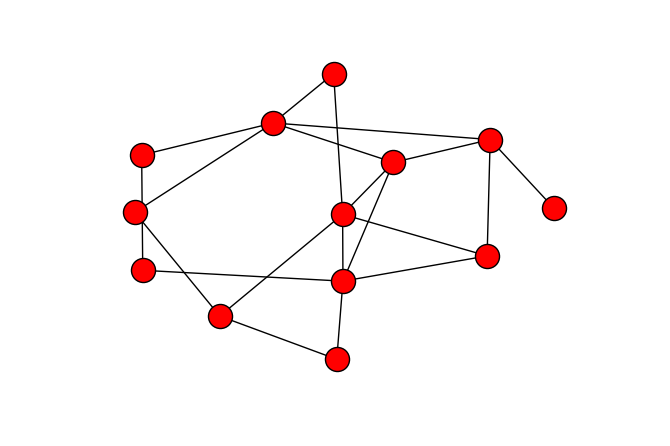

In [6]:
connected = False
while not connected:
    G = nx.gnm_random_graph(13, 20)
    connected = nx.is_connected(G)
nx.draw(G)

In [7]:
n = len(G.nodes())
edges = G.edges()
g = get_graph(n, edges)

In [8]:
import random
constraints = []
for i in range(10):
    first = random.randint(0, n-1)
    second = random.randint(0, n-1)
    if first != second:
        weight = random.random()
        constraints.append([first, second, weight])
        

In [9]:
constraints

[[5, 8, 0.24258616558002433],
 [5, 3, 0.23741336904175203],
 [10, 4, 0.7872565128224783],
 [2, 4, 0.32260278188350977],
 [1, 7, 0.6140525489616713],
 [3, 6, 0.14679217322699023],
 [5, 4, 0.05632260068555106],
 [7, 5, 0.06169231774041395],
 [1, 2, 0.8727173925065105],
 [6, 4, 0.1645856947041412]]

In [10]:
k = 2
gamma = random.random() * 10

In [11]:
bfc = BF_Checker(g, constraints, k, gamma)
print(bfc.is_feasible())
print(bfc.get_best())

True
4.428325178187194


In [12]:
cm = Clustering_Model(n, edges, constraints, k, gamma)
cm.solve()
print(cm.optimal)
print(cm.objective)

True
4.428325178187194
